In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

In [4]:
raw_csv_data = pd.read_csv('./input/013 IndexE8.csv')
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index('date', inplace=True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method='ffill')

In [5]:
df_comp['market_value'] = df_comp.spx

In [6]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df,df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [9]:
wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size = len(df))

In [14]:
df['wn'] = wn

In [16]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1091.374907
std,292.559287,291.380290
min,438.920000,-1.997564
25%,914.620000,898.617430
50%,1144.650000,1093.074053
75%,1316.280729,1293.697003
max,1570.252238,2083.902503


Text(0.5, 1.0, 'Whtie Noise Time-Series')

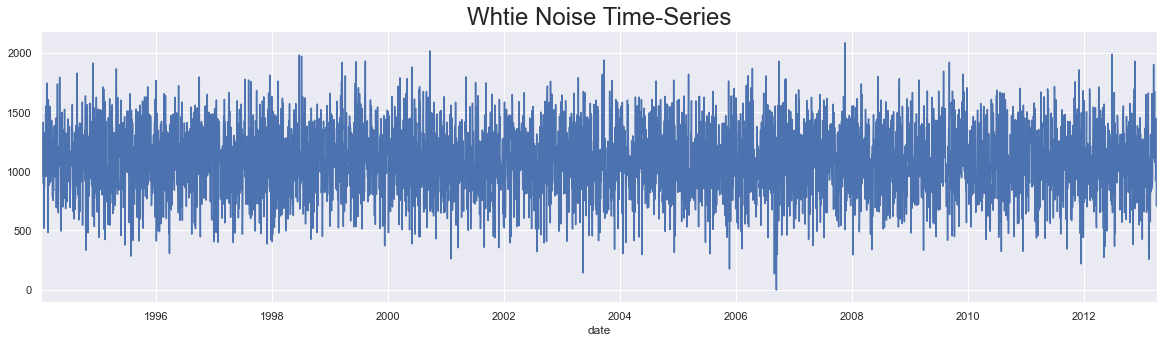

In [21]:
df.wn.plot(figsize=(20,5))
plt.title("Whtie Noise Time-Series",size=24)

(0.0, 2300.0)

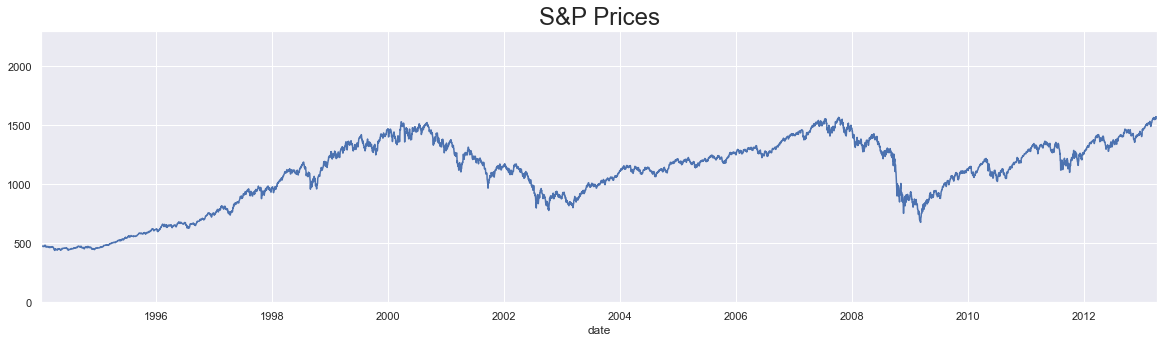

In [23]:
df.market_value.plot(figsize=(20,5))
plt.title("S&P Prices", size = 24)
plt.ylim(0,2300)

In [24]:
rw = pd.read_csv("./input/025 RandWalk.csv")
rw.date = pd.to_datetime(rw.date, dayfirst= True)
rw.set_index("date", inplace = True)
rw = rw.asfreq('b')

In [25]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [26]:
df['rw'] = rw.price

In [27]:
df.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,1707.706076,1122.139662
1994-01-10,475.27,1317.767988,1080.347860
1994-01-11,474.13,973.946715,1082.095245
1994-01-12,474.17,1339.180125,1083.639265
1994-01-13,472.47,1010.773836,1067.146255


Text(0.5, 1.0, 'Random Walk vs S&P')

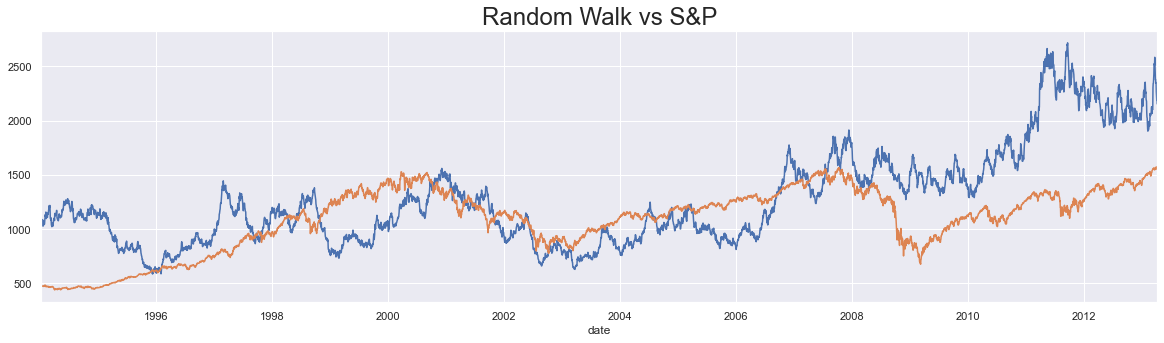

In [29]:
df.rw.plot(figsize=(20,5))
df.market_value.plot()
plt.title("Random Walk vs S&P", size = 24)

### Stationarity
In the most intuitive sense, stationarity means that the statistical properties of a process generating a time series do not change over time

mean, variance and covariance, do not vary with time

##### Dickey-Fuller test
Check if Dataset came from stationary process

<b>H0</b>: Non-stationarity (& < 1)

<b>H1</b>: & = 1

test statistics < critical value  =>  (Reject null) => The data came from stationarity proccess

In [35]:
sts.adfuller(df.market_value)

(-1.736984745235245,
 0.4121645696770616,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

- T statistics: -1.736984745235245
- P value: 0.4121645696770616
- Number of lags: 18
- Number of observations used: 5002
- significant levels: {
    '1%': -3.431658008603046,
    '5%': -2.862117998412982,
    '10%': -2.567077669247375
}

Notice that T statistics > then all significant levels(Critical values) those we cant say there is stationarity

P-val of 0.041 means that there is 40% to not reject the null hypothesis (<b>H0</b>) or in other words there is more then 40% that the data came from non-stationary proccess

lags * observations = len(df)

39904.880607487445 is something about auto-correlation the lower the values the easy to make predictions to future

In [36]:
sts.adfuller(df.wn)

(-71.83502833822777,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70762.83232381637)

In [37]:
sts.adfuller(df.rw)

(-1.3286073927689699,
 0.6159849181617394,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

### seasonality

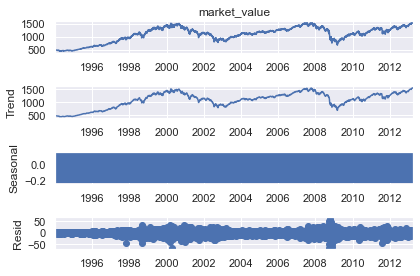

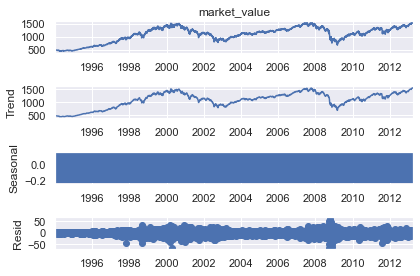

In [40]:
s_dec_additive = seasonal_decompose(df.market_value, model = "additive")
s_dec_additive.plot()

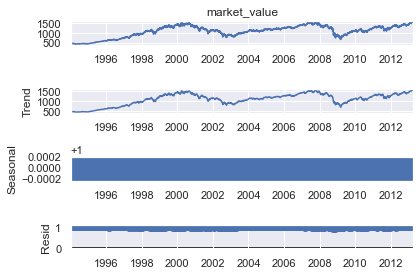

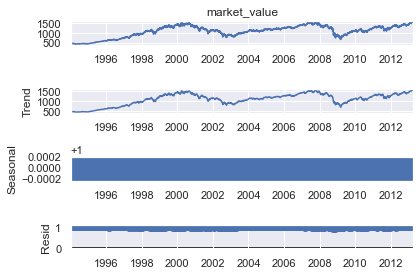

In [41]:
s_dec_multiplicative = seasonal_decompose(df.market_value, model = "multiplicative")
s_dec_multiplicative.plot()

From the the seasonality graph we can see that there is no seasonality in S&P500

### ACF
ACF is an (complete) auto-correlation function which gives us values of auto-correlation of any series with its lagged values

it describes how well the present value of the series is related with its past values

Text(0.5, 1.0, 'ACF S&P')

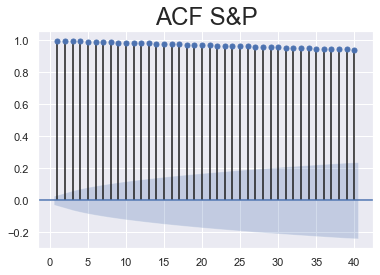

In [45]:
sgt.plot_acf(df.market_value, lags = 40, zero = False)
plt.title("ACF S&P", size=24)

<b>The blue dots above the blue region it suggests that to coefficient is significance which is indicator of time dependent in the data</b>

We can see that the lines decrease slowely, its mean that we can use the past as decent estimators

Text(0.5, 1.0, 'ACF WN')

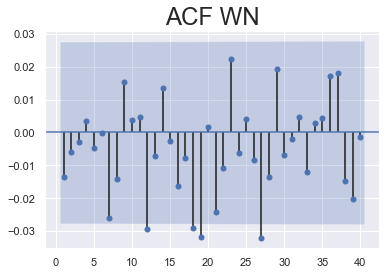

In [48]:
sgt.plot_acf(df.wn, lags = 40, zero = False)
plt.title("ACF WN", size=24)

### PACF
PACF is a partial auto-correlation function. Basically instead of finding correlations of present with lags like ACF, it finds correlation of the residuals 

Text(0.5, 1.0, 'PACF S&P')

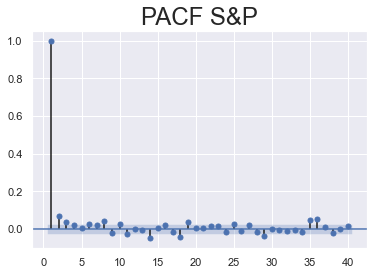

In [50]:
sgt.plot_pacf(df.market_value, lags = 40, zero = False, method = ('ols'))
plt.title("PACF S&P", size = 24)

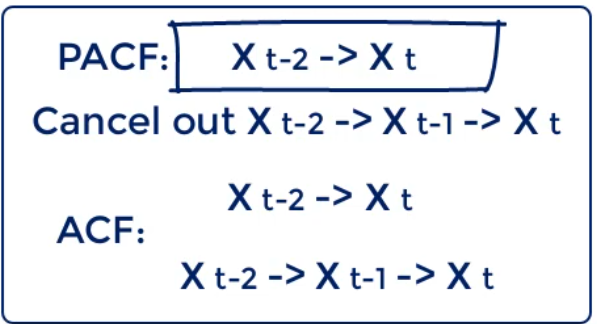

Text(0.5, 1.0, 'PACF WN')

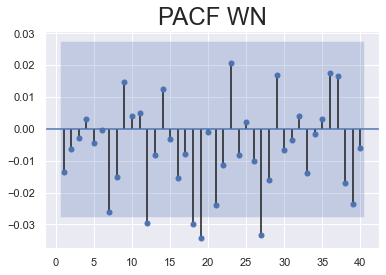

In [51]:
sgt.plot_pacf(df.wn, lags = 40, zero = False, method = ('ols'))
plt.title("PACF WN", size = 24)